### 1. Import and data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chess
from pandarallel import pandarallel

In [2]:
# Load clean dataset
df = pd.read_csv("data/chess_games_clean.csv")
df

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,Termination,NumMoves,FirstNMoves,BoardStateAtMoveN
0,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,blitz,Normal,71,d4 d5 c4 e6 g3 Nf6 Bg2 Bb4+ Nd2 O-O Nf3 dxc4 O...,8/5pkp/b1p3p1/2P5/5Q2/1Nn1P1P1/5P1P/3q1BK1 w -...
1,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,blitz,Normal,71,e4 c5 d4 cxd4 Nf3 e6 Nxd4 Bc5 Nc3 Ne7 Be3 a6 N...,3k3r/6Rp/2nB4/p3pPP1/1pK1P3/8/n1P3BP/8 w - - 0 31
2,Rated Blitz game,2024.01.01,falerito,estaka1,0-1,A08,2404,2534,blitz,Time forfeit,98,e4 c5 Nf3 e6 d3 d5 Nbd2 Nf6 g3 Nc6 Bg2 Be7 O-O...,6k1/2q2p1p/bn2p1pP/3pP3/pR1P1P2/P1p1NNP1/2P3B1...
3,Rated Blitz game,2024.01.01,TorBot_SL,ToromBot,1/2-1/2,E61,2860,2922,blitz,Normal,61,e3 d6 d4 g6 Nf3 Bg7 c4 Nf6 Nc3 O-O Be2 Bf5 Nd2...,3q4/r2n1pbk/1p2b1pp/2pNp3/p1PnP3/2RBBN1P/PP3PP...
4,Rated Blitz game,2024.01.01,CPU2006,Phalanx-XXV,1-0,D46,2752,2395,blitz,Normal,155,c4 c6 d4 d5 Nf3 Nf6 Nc3 e6 e3 Nbd7 Qc2 Bd6 Bd3...,r3r1k1/1N1R1pp1/2R4p/pn6/1p2PP2/1P3KP1/P7/8 w ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435469,Rated Blitz game,2024.12.31,man_man_lai,AM0R_FATI,1-0,B31,2604,2584,blitz,Normal,65,e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 b6 Nc...,3q4/B6k/2p1b1p1/2Q1p2p/NPp1P3/6PP/2P2P1K/2b5 w...
2435470,Rated Blitz game,2024.12.31,cad2024,emiliofelixramirez,1-0,D23,2537,2449,blitz,Time forfeit,123,d4 d5 c4 dxc4 Nf3 Nf6 g3 Nc6 Bg2 Be6 O-O h6 Nc...,1r4k1/5pp1/5q1p/3PpP2/2pnB3/6PP/1P3Q1K/3R4 w -...
2435471,Rated Blitz game,2024.12.31,learningchessreally,BiletskiyDanylo,0-1,A15,2583,2557,blitz,Time forfeit,104,Nf3 Nf6 c4 e6 Nc3 Be7 e4 O-O d4 c5 d5 exd5 cxd...,3r4/1p3kpp/p2B4/P1Pn4/8/5P2/5KPP/2R5 w - - 2 31
2435472,Rated Blitz game,2024.12.31,lotrisking,ezis71,1-0,D30,2513,2398,blitz,Normal,103,d4 d5 c4 e6 Nf3 a6 g3 dxc4 Bg2 b5 O-O Bb7 a4 N...,r5k1/5ppp/p1R1p3/P3B3/1b6/5PP1/4P1KP/8 w - - 0 31


### 2. Variable encoding
Convert `Result` to numeric for machine learning

In [3]:
result_map = {"0-1": 0, "1/2-1/2": 1, "1-0": 2}

df["ResultNumeric"] = df["Result"].map(result_map)

Also convert the `EventType` to numeric for machine learning

In [4]:
event_type_map = {"blitz": 0, "rapid": 1, "classical": 2}
df["EventTypeID"] = df["EventType"].map(event_type_map)
df.head(10)

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,Termination,NumMoves,FirstNMoves,BoardStateAtMoveN,ResultNumeric,EventTypeID
0,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,blitz,Normal,71,d4 d5 c4 e6 g3 Nf6 Bg2 Bb4+ Nd2 O-O Nf3 dxc4 O...,8/5pkp/b1p3p1/2P5/5Q2/1Nn1P1P1/5P1P/3q1BK1 w -...,1,0
1,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,blitz,Normal,71,e4 c5 d4 cxd4 Nf3 e6 Nxd4 Bc5 Nc3 Ne7 Be3 a6 N...,3k3r/6Rp/2nB4/p3pPP1/1pK1P3/8/n1P3BP/8 w - - 0 31,2,0
2,Rated Blitz game,2024.01.01,falerito,estaka1,0-1,A08,2404,2534,blitz,Time forfeit,98,e4 c5 Nf3 e6 d3 d5 Nbd2 Nf6 g3 Nc6 Bg2 Be7 O-O...,6k1/2q2p1p/bn2p1pP/3pP3/pR1P1P2/P1p1NNP1/2P3B1...,0,0
3,Rated Blitz game,2024.01.01,TorBot_SL,ToromBot,1/2-1/2,E61,2860,2922,blitz,Normal,61,e3 d6 d4 g6 Nf3 Bg7 c4 Nf6 Nc3 O-O Be2 Bf5 Nd2...,3q4/r2n1pbk/1p2b1pp/2pNp3/p1PnP3/2RBBN1P/PP3PP...,1,0
4,Rated Blitz game,2024.01.01,CPU2006,Phalanx-XXV,1-0,D46,2752,2395,blitz,Normal,155,c4 c6 d4 d5 Nf3 Nf6 Nc3 e6 e3 Nbd7 Qc2 Bd6 Bd3...,r3r1k1/1N1R1pp1/2R4p/pn6/1p2PP2/1P3KP1/P7/8 w ...,2,0
5,Rated Blitz game,2024.01.01,MadderRose,Philidor23,1-0,B38,2538,2430,blitz,Normal,67,c4 c5 Nf3 g6 e4 Bg7 d4 cxd4 Nxd4 Nc6 Be3 d6 Nc...,6k1/1p4r1/3q1pp1/Q7/7R/8/PP3PP1/6K1 w - - 0 31,2,0
6,Rated Blitz game,2024.01.01,KhusnutDudajanMag,O-Almeida,1-0,A00,2558,2685,blitz,Time forfeit,137,e3 g6 Nf3 Bg7 d4 f5 b3 Nf6 Bb2 O-O Nbd2 d6 c4 ...,2rr4/1p2q1k1/1Qpp2p1/1Pn1pp1p/p1P5/4PP2/P2RB1P...,2,0
7,Rated Blitz game,2024.01.01,david_gomez,Marvel2,0-1,E81,2514,2351,blitz,Normal,98,d4 g6 e4 Bg7 c4 d6 Nc3 Nf6 f3 O-O Be3 c5 Nge2 ...,2r5/2Pkpp1p/p2pb1p1/B7/4P3/2R2P2/6PP/6K1 w - -...,0,0
8,Rated Blitz game,2024.01.01,che6ype1ka,ARDosina,1-0,D42,2582,2494,blitz,Normal,93,Nf3 e6 c4 d5 e3 Nf6 Nc3 c5 cxd5 Nxd5 d4 Nc6 Bd...,2rqr3/p4k2/1p2p3/5pp1/2nP4/P1P2NP1/4Q1P1/3RR1K...,2,0
9,Rated Blitz game,2024.01.01,BulletMND,Kumi,1-0,C00,2497,2529,blitz,Normal,91,e4 e6 d4 b6 Bd3 Bb7 Qe2 f5 exf5 Bxg2 Qh5+ g6 f...,5k2/r1p4R/3ppB2/pp6/3P4/8/PP6/4K3 w - - 0 31,2,0


### 2.5 Exploratory data analysis (EDA)

In [5]:
print(f"Total games: {len(df):,}")
print(f"Total features: {df.shape[1]}")
print(f"\nDate range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Unique players (White): {df['White'].nunique():,}")
print(f"Unique players (Black): {df['Black'].nunique():,}")
print(f"Unique ECO codes: {df['ECO'].nunique()}")

Total games: 2,435,474
Total features: 15

Date range: 2024.01.01 to 2024.12.31
Unique players (White): 47,408
Unique players (Black): 46,857
Unique ECO codes: 496


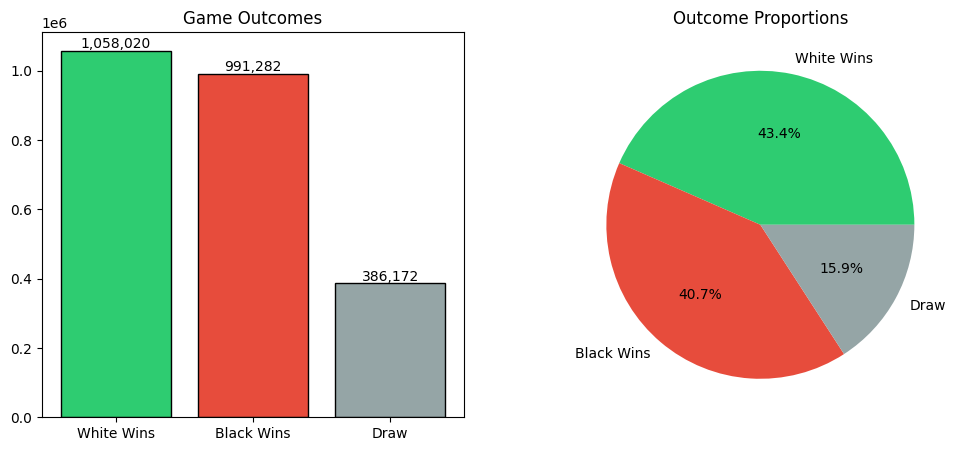

In [6]:
# Count results
counts = df["Result"].value_counts()
labels = ["White Wins", "Black Wins", "Draw"]
colors = ["#2ecc71", "#e74c3c", "#95a5a6"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
axes[0].bar(labels, counts.values, color=colors, edgecolor="black")
axes[0].set_title("Game Outcomes")
for i, v in enumerate(counts.values):
    axes[0].text(i, v, f"{v:,}", ha="center", va="bottom")

# Pie chart
axes[1].pie(counts.values, labels=labels, autopct="%1.1f%%", colors=colors)
axes[1].set_title("Outcome Proportions")

plt.show()

#### Event type

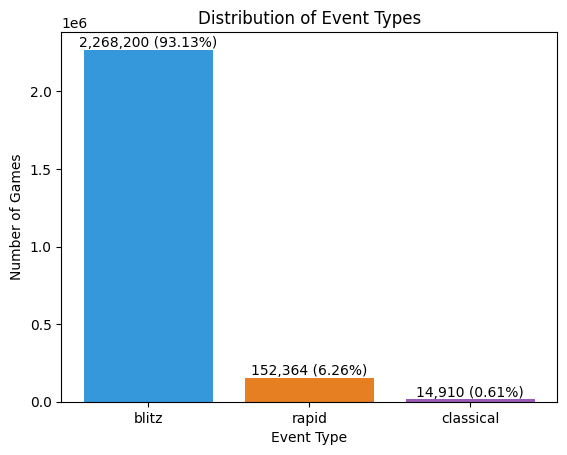

In [7]:
event_counts = df["EventType"].value_counts()
event_pcts = df["EventType"].value_counts(normalize=True) * 100

# Visualization
bars = plt.bar(
    event_counts.index, event_counts.values, color=["#3498db", "#e67e22", "#9b59b6"]
)

plt.xlabel("Event Type")
plt.ylabel("Number of Games")
plt.title("Distribution of Event Types")

# Add number above each bar
for bar in bars:
    event = bar.get_x() + bar.get_width() / 2
    height = bar.get_height()
    pct = (height / event_counts.sum()) * 100
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height):,} ({pct:.2f}%)",
        ha="center",
        va="bottom",
    )

plt.show()

#### Elo rating 

/tmp/ipykernel_4059/514932698.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(["White Elo", "Black Elo"])


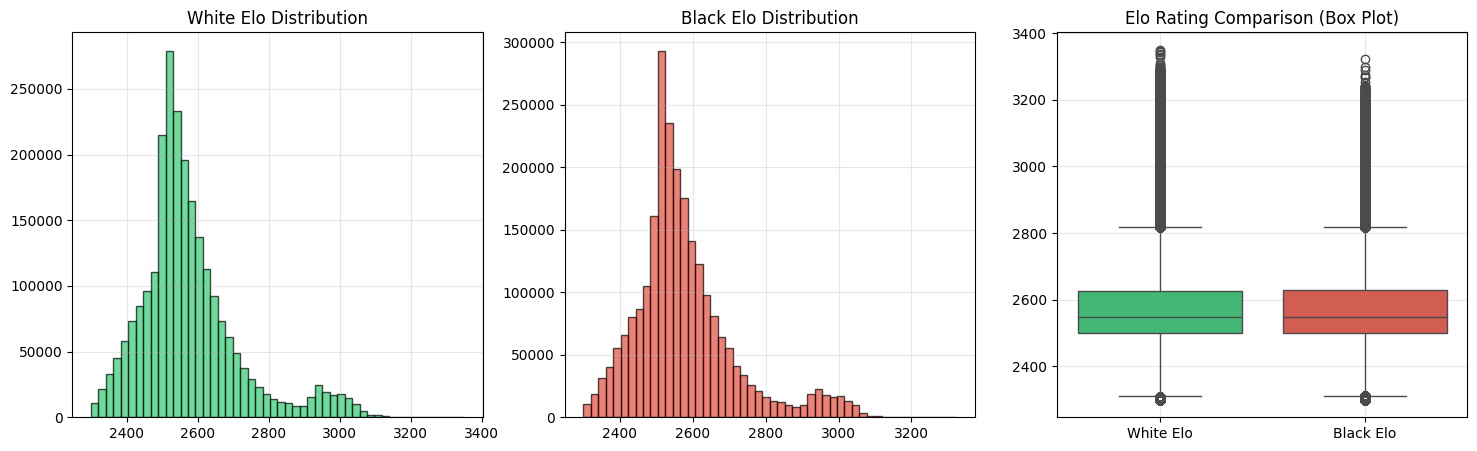

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram for White Elo
axes[0].hist(df["WhiteElo"], bins=50, color="#2ecc71", alpha=0.7, edgecolor="black")
axes[0].set_title("White Elo Distribution")
axes[0].grid(alpha=0.3)

# Histogram for Black Elo
axes[1].hist(df["BlackElo"], bins=50, color="#e74c3c", alpha=0.7, edgecolor="black")
axes[1].set_title("Black Elo Distribution")
axes[1].grid(alpha=0.3)

# Boxplot comparison
sns.boxplot(
    data=[df["WhiteElo"], df["BlackElo"]], palette=["#2ecc71", "#e74c3c"], ax=axes[2]
)
axes[2].set_xticklabels(["White Elo", "Black Elo"])
axes[2].set_title("Elo Rating Comparison (Box Plot)")
axes[2].grid(alpha=0.3)

plt.show()

#### ECO / Opening


Top 20 Most Common Openings:
   1. A00: 59,619 (2.45%)
   2. A45: 58,776 (2.41%)
   3. D02: 53,630 (2.20%)
   4. A05: 50,060 (2.06%)
   5. B00: 48,529 (1.99%)
   6. B12: 46,689 (1.92%)
   7. A40: 46,290 (1.90%)
   8. A04: 45,394 (1.86%)
   9. B40: 42,225 (1.73%)
  10. B06: 42,085 (1.73%)
  11. B01: 38,559 (1.58%)
  12. A01: 37,799 (1.55%)
  13. A46: 36,995 (1.52%)
  14. C00: 35,140 (1.44%)
  15. D00: 34,897 (1.43%)
  16. B10: 34,527 (1.42%)
  17. B90: 33,549 (1.38%)
  18. B23: 31,881 (1.31%)
  19. B22: 30,347 (1.25%)
  20. B30: 29,112 (1.20%)

Top 20 ECO codes coverage: 34.33% of all games


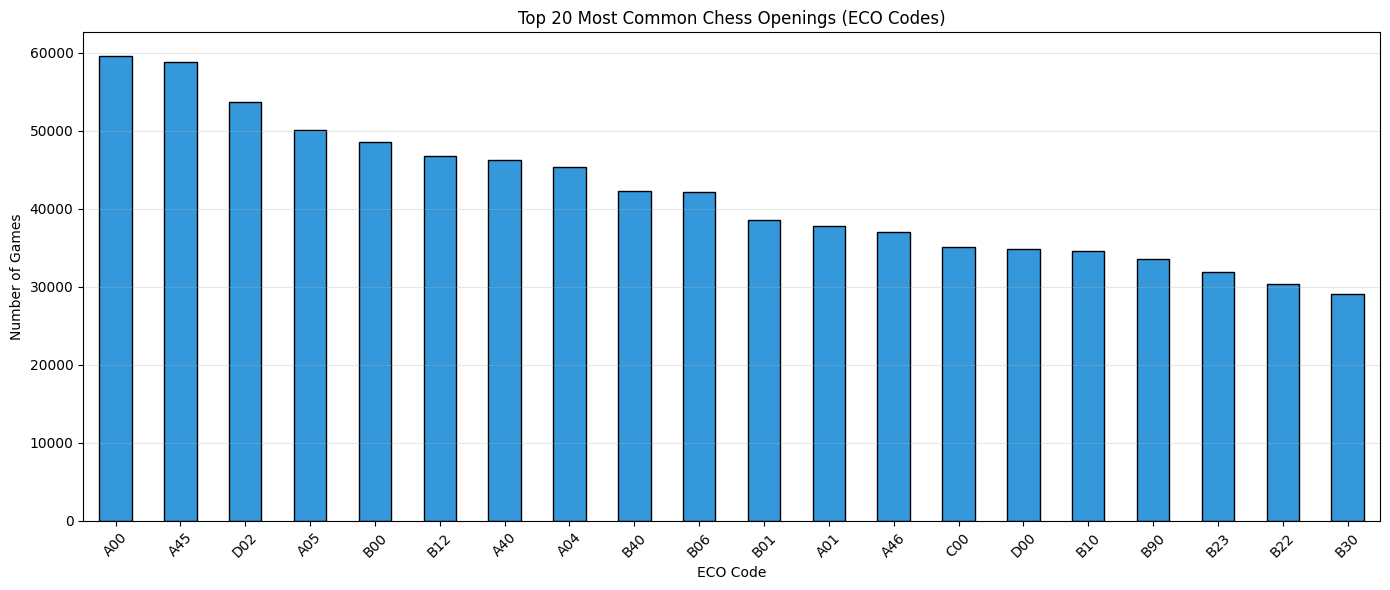

In [9]:
print("\nTop 20 Most Common Openings:")
top_20_display = df["ECO"].value_counts().head(20)
for i, (eco, count) in enumerate(top_20_display.items(), 1):
    pct = count / len(df) * 100
    print(f"  {i:2d}. {eco}: {count:,} ({pct:.2f}%)")

# Coverage analysis
top_20_coverage = top_20_display.sum() / len(df) * 100
print(f"\nTop 20 ECO codes coverage: {top_20_coverage:.2f}% of all games")

# Visualization
plt.figure(figsize=(14, 6))
top_20_display.plot(kind="bar", color="#3498db", edgecolor="black")
plt.xlabel("ECO Code")
plt.ylabel("Number of Games")
plt.title("Top 20 Most Common Chess Openings (ECO Codes)")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

#### Initial correlation

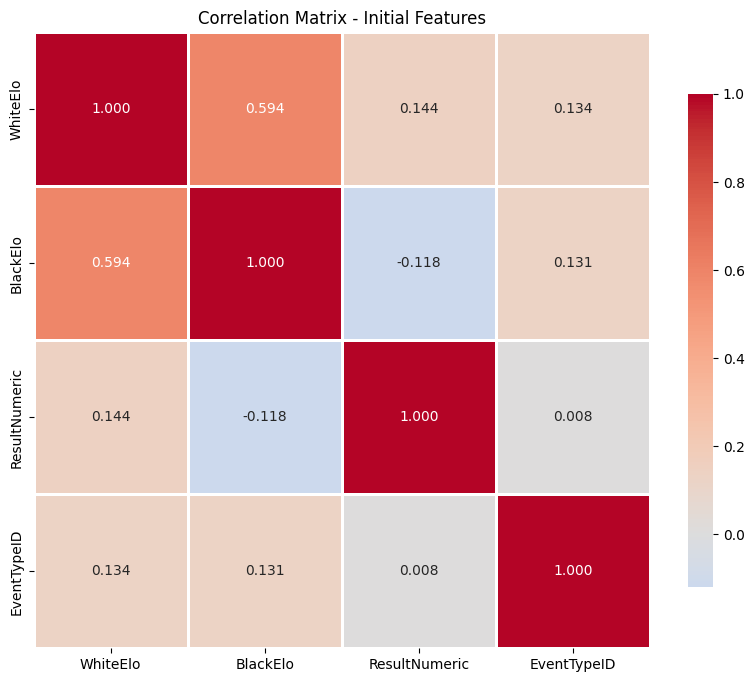

In [10]:
numeric_cols = ["WhiteElo", "BlackElo", "ResultNumeric", "EventTypeID"]
corr_matrix = df[numeric_cols].corr()

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation Matrix - Initial Features")

plt.show()

#### Result by event type

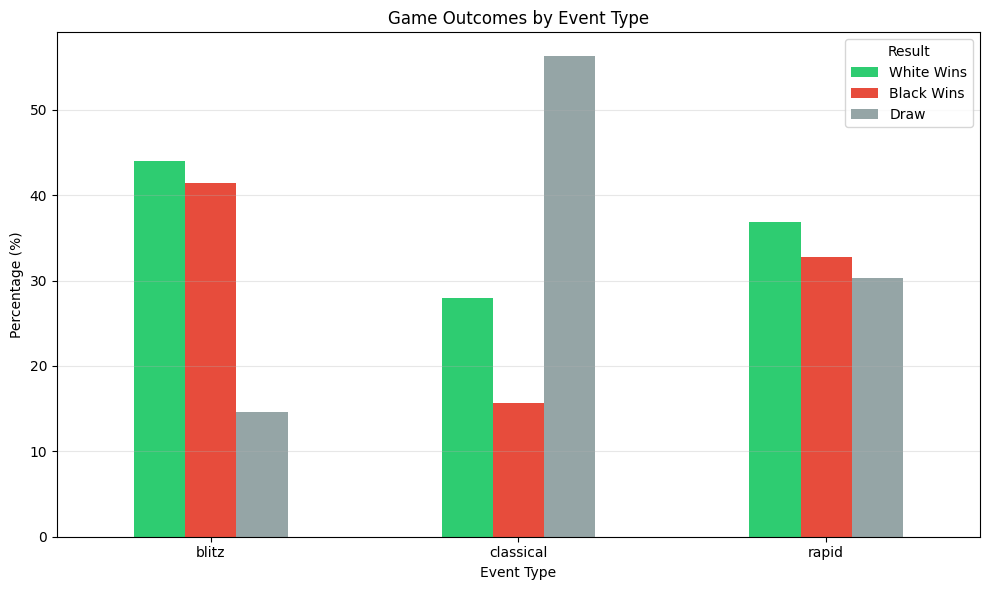

In [11]:
result_by_event = pd.crosstab(df["EventType"], df["Result"], normalize="index") * 100
result_by_event = result_by_event[["1-0", "0-1", "1/2-1/2"]]
result_by_event.columns = ["White Wins", "Black Wins", "Draw"]

# Visualization
result_by_event.plot(
    kind="bar", stacked=False, figsize=(10, 6), color=["#2ecc71", "#e74c3c", "#95a5a6"]
)

plt.xlabel("Event Type")
plt.ylabel("Percentage (%)")
plt.title("Game Outcomes by Event Type")
plt.legend(title="Result", labels=["White Wins", "Black Wins", "Draw"])
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

### 3. Basic feature engineering
create new numeric features for machine learning 

In [12]:
# Rating difference
df["RatingDiff"] = np.abs(df["WhiteElo"] - df["BlackElo"])

# Average rating
df["AvgRating"] = (df["WhiteElo"] + df["BlackElo"]) / 2

# Indicator if White is higher rated (binary)
df["WhiteIsHigherRated"] = (df["WhiteElo"] > df["BlackElo"]).astype(int)

# Rating advantage (signed - keeps direction)
df["WhiteRatingAdvantage"] = df["WhiteElo"] - df["BlackElo"]
df

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,Termination,NumMoves,FirstNMoves,BoardStateAtMoveN,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage
0,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,blitz,Normal,71,d4 d5 c4 e6 g3 Nf6 Bg2 Bb4+ Nd2 O-O Nf3 dxc4 O...,8/5pkp/b1p3p1/2P5/5Q2/1Nn1P1P1/5P1P/3q1BK1 w -...,1,0,109,2541.5,0,-109
1,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,blitz,Normal,71,e4 c5 d4 cxd4 Nf3 e6 Nxd4 Bc5 Nc3 Ne7 Be3 a6 N...,3k3r/6Rp/2nB4/p3pPP1/1pK1P3/8/n1P3BP/8 w - - 0 31,2,0,109,2487.5,1,109
2,Rated Blitz game,2024.01.01,falerito,estaka1,0-1,A08,2404,2534,blitz,Time forfeit,98,e4 c5 Nf3 e6 d3 d5 Nbd2 Nf6 g3 Nc6 Bg2 Be7 O-O...,6k1/2q2p1p/bn2p1pP/3pP3/pR1P1P2/P1p1NNP1/2P3B1...,0,0,130,2469.0,0,-130
3,Rated Blitz game,2024.01.01,TorBot_SL,ToromBot,1/2-1/2,E61,2860,2922,blitz,Normal,61,e3 d6 d4 g6 Nf3 Bg7 c4 Nf6 Nc3 O-O Be2 Bf5 Nd2...,3q4/r2n1pbk/1p2b1pp/2pNp3/p1PnP3/2RBBN1P/PP3PP...,1,0,62,2891.0,0,-62
4,Rated Blitz game,2024.01.01,CPU2006,Phalanx-XXV,1-0,D46,2752,2395,blitz,Normal,155,c4 c6 d4 d5 Nf3 Nf6 Nc3 e6 e3 Nbd7 Qc2 Bd6 Bd3...,r3r1k1/1N1R1pp1/2R4p/pn6/1p2PP2/1P3KP1/P7/8 w ...,2,0,357,2573.5,1,357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435469,Rated Blitz game,2024.12.31,man_man_lai,AM0R_FATI,1-0,B31,2604,2584,blitz,Normal,65,e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 b6 Nc...,3q4/B6k/2p1b1p1/2Q1p2p/NPp1P3/6PP/2P2P1K/2b5 w...,2,0,20,2594.0,1,20
2435470,Rated Blitz game,2024.12.31,cad2024,emiliofelixramirez,1-0,D23,2537,2449,blitz,Time forfeit,123,d4 d5 c4 dxc4 Nf3 Nf6 g3 Nc6 Bg2 Be6 O-O h6 Nc...,1r4k1/5pp1/5q1p/3PpP2/2pnB3/6PP/1P3Q1K/3R4 w -...,2,0,88,2493.0,1,88
2435471,Rated Blitz game,2024.12.31,learningchessreally,BiletskiyDanylo,0-1,A15,2583,2557,blitz,Time forfeit,104,Nf3 Nf6 c4 e6 Nc3 Be7 e4 O-O d4 c5 d5 exd5 cxd...,3r4/1p3kpp/p2B4/P1Pn4/8/5P2/5KPP/2R5 w - - 2 31,0,0,26,2570.0,1,26
2435472,Rated Blitz game,2024.12.31,lotrisking,ezis71,1-0,D30,2513,2398,blitz,Normal,103,d4 d5 c4 e6 Nf3 a6 g3 dxc4 Bg2 b5 O-O Bb7 a4 N...,r5k1/5ppp/p1R1p3/P3B3/1b6/5PP1/4P1KP/8 w - - 0 31,2,0,115,2455.5,1,115


### 4. Opening encoding (ECO)
Since there is almost 500 different ECO, we decide to just use the top 20 most use while the rest will be others.

In [13]:
# Get top 20 ECO codes
top_20_eco = df["ECO"].value_counts().head(20).index.tolist()


# Group less frequent ECO codes into 'Other'
def group_eco(code):
    if code in top_20_eco:
        return code
    return "Other"


df["ECOGroup"] = df["ECO"].apply(group_eco)
eco_categories = ["Other"] + top_20_eco
df["ECOID"] = df["ECOGroup"].apply(lambda x: eco_categories.index(x))
df.head()

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,Termination,...,FirstNMoves,BoardStateAtMoveN,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage,ECOGroup,ECOID
0,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,blitz,Normal,...,d4 d5 c4 e6 g3 Nf6 Bg2 Bb4+ Nd2 O-O Nf3 dxc4 O...,8/5pkp/b1p3p1/2P5/5Q2/1Nn1P1P1/5P1P/3q1BK1 w -...,1,0,109,2541.5,0,-109,Other,0
1,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,blitz,Normal,...,e4 c5 d4 cxd4 Nf3 e6 Nxd4 Bc5 Nc3 Ne7 Be3 a6 N...,3k3r/6Rp/2nB4/p3pPP1/1pK1P3/8/n1P3BP/8 w - - 0 31,2,0,109,2487.5,1,109,B40,9
2,Rated Blitz game,2024.01.01,falerito,estaka1,0-1,A08,2404,2534,blitz,Time forfeit,...,e4 c5 Nf3 e6 d3 d5 Nbd2 Nf6 g3 Nc6 Bg2 Be7 O-O...,6k1/2q2p1p/bn2p1pP/3pP3/pR1P1P2/P1p1NNP1/2P3B1...,0,0,130,2469.0,0,-130,Other,0
3,Rated Blitz game,2024.01.01,TorBot_SL,ToromBot,1/2-1/2,E61,2860,2922,blitz,Normal,...,e3 d6 d4 g6 Nf3 Bg7 c4 Nf6 Nc3 O-O Be2 Bf5 Nd2...,3q4/r2n1pbk/1p2b1pp/2pNp3/p1PnP3/2RBBN1P/PP3PP...,1,0,62,2891.0,0,-62,Other,0
4,Rated Blitz game,2024.01.01,CPU2006,Phalanx-XXV,1-0,D46,2752,2395,blitz,Normal,...,c4 c6 d4 d5 Nf3 Nf6 Nc3 e6 e3 Nbd7 Qc2 Bd6 Bd3...,r3r1k1/1N1R1pp1/2R4p/pn6/1p2PP2/1P3KP1/P7/8 w ...,2,0,357,2573.5,1,357,Other,0


### 5. FirstNMoves feature engineer

In [14]:
pandarallel.initialize(nb_workers=12, progress_bar=True)


def extract_smart_early_features(moves_str):
    """
    Extract chess-intelligent features from moves provided.
    Works for any N: uses all moves in FirstNMoves.
    """
    # Default values if no moves
    default_features = {
        # Material totals
        "w_material_early": 39,
        "b_material_early": 39,
        "material_diff_early": 0,
        # Captures & aggression
        "w_captures_early": 0,
        "b_captures_early": 0,
        "capture_diff_early": 0,
        "w_aggression_early": 0.0,
        "b_aggression_early": 0.0,
        "aggression_diff_early": 0.0,
        # Center control
        "w_center_control": 0,
        "b_center_control": 0,
        "center_diff": 0,
        # Development
        "w_development": 0,
        "b_development": 0,
        "development_diff": 0,
        # King safety
        "w_castled_early": 0,
        "b_castled_early": 0,
        # Checks
        "early_checks": 0,
        "w_checks_early": 0,
        "b_checks_early": 0,
        # Piece activity
        "w_piece_activity": 0,
        "b_piece_activity": 0,
        # Piece counts
        "w_pawns": 0,
        "b_pawns": 0,
        "pawn_diff": 0,
        "w_knights": 0,
        "b_knights": 0,
        "knight_diff": 0,
        "w_bishops": 0,
        "b_bishops": 0,
        "bishop_diff": 0,
        "w_rooks": 0,
        "b_rooks": 0,
        "rook_diff": 0,
        "w_queens": 0,
        "b_queens": 0,
        "queen_diff": 0,
        # Pawn structure
        "w_doubled_pawns": 0,
        "b_doubled_pawns": 0,
        "doubled_pawns_diff": 0,
        "w_isolated_pawns": 0,
        "b_isolated_pawns": 0,
        "isolated_pawns_diff": 0,
        # bishop pair & major piece structure
        "w_has_bishop_pair": 0,
        "b_has_bishop_pair": 0,
        "bishop_pair_diff": 0,
        "w_major_pieces": 0,
        "b_major_pieces": 0,
        "major_pieces_diff": 0,
        "w_has_queen": 0,
        "b_has_queen": 0,
        "queen_presence_diff": 0,
    }

    if pd.isna(moves_str) or moves_str == "":
        return pd.Series(default_features)

    board = chess.Board()
    moves = moves_str.split()

    # Track captures and checks
    w_captures = b_captures = w_checks = b_checks = 0

    for i, move_san in enumerate(moves):
        try:
            if "x" in move_san:
                if i % 2 == 0:
                    w_captures += 1
                else:
                    b_captures += 1

            if "+" in move_san or "#" in move_san:
                if i % 2 == 0:
                    w_checks += 1
                else:
                    b_checks += 1

            board.push_san(move_san)
        except:
            break

    features = {}

    # 1. Material totals
    piece_values = {
        chess.PAWN: 1,
        chess.KNIGHT: 3,
        chess.BISHOP: 3,
        chess.ROOK: 5,
        chess.QUEEN: 9,
        chess.KING: 0,
    }

    w_material = b_material = 0

    # Per-piece counters
    w_pawns = w_knights = w_bishops = w_rooks = w_queens = 0
    b_pawns = b_knights = b_bishops = b_rooks = b_queens = 0

    for square in chess.SQUARES:
        piece = board.piece_at(square)
        if not piece:
            continue

        value = piece_values[piece.piece_type]

        if piece.color == chess.WHITE:
            w_material += value
            if piece.piece_type == chess.PAWN:
                w_pawns += 1
            elif piece.piece_type == chess.KNIGHT:
                w_knights += 1
            elif piece.piece_type == chess.BISHOP:
                w_bishops += 1
            elif piece.piece_type == chess.ROOK:
                w_rooks += 1
            elif piece.piece_type == chess.QUEEN:
                w_queens += 1
        else:
            b_material += value
            if piece.piece_type == chess.PAWN:
                b_pawns += 1
            elif piece.piece_type == chess.KNIGHT:
                b_knights += 1
            elif piece.piece_type == chess.BISHOP:
                b_bishops += 1
            elif piece.piece_type == chess.ROOK:
                b_rooks += 1
            elif piece.piece_type == chess.QUEEN:
                b_queens += 1

    features["w_material_early"] = w_material
    features["b_material_early"] = b_material
    features["material_diff_early"] = w_material - b_material

    # Per-piece diffs
    features["w_pawns"] = w_pawns
    features["b_pawns"] = b_pawns
    features["pawn_diff"] = w_pawns - b_pawns

    features["w_knights"] = w_knights
    features["b_knights"] = b_knights
    features["knight_diff"] = w_knights - b_knights

    features["w_bishops"] = w_bishops
    features["b_bishops"] = b_bishops
    features["bishop_diff"] = w_bishops - b_bishops

    features["w_rooks"] = w_rooks
    features["b_rooks"] = b_rooks
    features["rook_diff"] = w_rooks - b_rooks

    features["w_queens"] = w_queens
    features["b_queens"] = b_queens
    features["queen_diff"] = w_queens - b_queens

    # Bishop pair
    features["w_has_bishop_pair"] = 1 if w_bishops >= 2 else 0
    features["b_has_bishop_pair"] = 1 if b_bishops >= 2 else 0
    features["bishop_pair_diff"] = (
        features["w_has_bishop_pair"] - features["b_has_bishop_pair"]
    )

    # Major pieces & queen presence
    features["w_major_pieces"] = w_queens + w_rooks
    features["b_major_pieces"] = b_queens + b_rooks
    features["major_pieces_diff"] = (
        features["w_major_pieces"] - features["b_major_pieces"]
    )

    features["w_has_queen"] = 1 if w_queens >= 1 else 0
    features["b_has_queen"] = 1 if b_queens >= 1 else 0
    features["queen_presence_diff"] = features["w_has_queen"] - features["b_has_queen"]

    # Captures & aggression
    features["w_captures_early"] = w_captures
    features["b_captures_early"] = b_captures
    features["capture_diff_early"] = w_captures - b_captures

    moves_played = len(moves)
    w_moves = (moves_played + 1) // 2
    b_moves = moves_played // 2

    features["w_aggression_early"] = (w_captures + w_checks) / max(1, w_moves)
    features["b_aggression_early"] = (b_captures + b_checks) / max(1, b_moves)
    features["aggression_diff_early"] = (
        features["w_aggression_early"] - features["b_aggression_early"]
    )

    # Center control
    center_squares = [chess.E4, chess.E5, chess.D4, chess.D5]
    features["w_center_control"] = sum(
        1 for sq in center_squares if board.is_attacked_by(chess.WHITE, sq)
    )
    features["b_center_control"] = sum(
        1 for sq in center_squares if board.is_attacked_by(chess.BLACK, sq)
    )
    features["center_diff"] = (
        features["w_center_control"] - features["b_center_control"]
    )

    # Development
    w_back_rank = [
        chess.A1,
        chess.B1,
        chess.C1,
        chess.D1,
        chess.E1,
        chess.F1,
        chess.G1,
        chess.H1,
    ]
    b_back_rank = [
        chess.A8,
        chess.B8,
        chess.C8,
        chess.D8,
        chess.E8,
        chess.F8,
        chess.G8,
        chess.H8,
    ]

    features["w_development"] = sum(
        1
        for sq in w_back_rank
        if board.piece_at(sq) is None
        or (board.piece_at(sq) and board.piece_at(sq).piece_type == chess.KING)
    )
    features["b_development"] = sum(
        1
        for sq in b_back_rank
        if board.piece_at(sq) is None
        or (board.piece_at(sq) and board.piece_at(sq).piece_type == chess.KING)
    )
    features["development_diff"] = features["w_development"] - features["b_development"]

    # King safety
    w_king_sq = board.king(chess.WHITE)
    b_king_sq = board.king(chess.BLACK)

    features["w_castled_early"] = 1 if w_king_sq in [chess.G1, chess.C1] else 0
    features["b_castled_early"] = 1 if b_king_sq in [chess.G8, chess.C8] else 0

    # Checks
    features["w_checks_early"] = w_checks
    features["b_checks_early"] = b_checks
    features["early_checks"] = w_checks + b_checks

    # Piece activity
    features["w_piece_activity"] = sum(
        1 for sq in chess.SQUARES if board.is_attacked_by(chess.WHITE, sq)
    )
    features["b_piece_activity"] = sum(
        1 for sq in chess.SQUARES if board.is_attacked_by(chess.BLACK, sq)
    )

    # Pawn structure
    w_pawn_files = {f: 0 for f in range(8)}
    b_pawn_files = {f: 0 for f in range(8)}

    for square in chess.SQUARES:
        piece = board.piece_at(square)
        if not piece or piece.piece_type != chess.PAWN:
            continue
        file_idx = chess.square_file(square)
        if piece.color == chess.WHITE:
            w_pawn_files[file_idx] += 1
        else:
            b_pawn_files[file_idx] += 1

    w_doubled = sum(1 for c in w_pawn_files.values() if c > 1)
    b_doubled = sum(1 for c in b_pawn_files.values() if c > 1)

    def count_isolated(pawn_files):
        isolated = 0
        for f in range(8):
            if pawn_files[f] == 0:
                continue
            left = pawn_files.get(f - 1, 0)
            right = pawn_files.get(f + 1, 0)
            if left == 0 and right == 0:
                isolated += pawn_files[f]
        return isolated

    w_isolated = count_isolated(w_pawn_files)
    b_isolated = count_isolated(b_pawn_files)

    features["w_doubled_pawns"] = w_doubled
    features["b_doubled_pawns"] = b_doubled
    features["doubled_pawns_diff"] = w_doubled - b_doubled

    features["w_isolated_pawns"] = w_isolated
    features["b_isolated_pawns"] = b_isolated
    features["isolated_pawns_diff"] = w_isolated - b_isolated

    return pd.Series(features)


early_features_df = df["FirstNMoves"].parallel_apply(extract_smart_early_features)

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [15]:
df = pd.concat(
    [df.reset_index(drop=True), early_features_df.reset_index(drop=True)], axis=1
)

Additional features

In [16]:
df["both_castled_early"] = (
    (df["w_castled_early"] == 1) & (df["b_castled_early"] == 1)
).astype(int)
df["total_captures_early"] = df["w_captures_early"] + df["b_captures_early"]
df["activity_diff"] = df["w_piece_activity"] - df["b_piece_activity"]

### 6. Remove unneeded columns

In [17]:
# 'Event', 'EventType', 'Result','ECO' and 'ECOGroup' can be drop because there is 'EventTypeID', 'ECOID', 'ResultNumeric'
# 'Date' is not used for the data since it is just data about time
# Same with 'White' and 'Black', these are just the username so the data is not used
df = df.drop(
    [
        "Event",
        "Date",
        "White",
        "Black",
        "Result",
        "ECO",
        "ECOGroup",
        "EventType",
        "FirstNMoves",
        "Termination",
        "BoardStateAtMoveN",
        "NumMoves",
    ],
    axis=1,
)

### 7. Exported featured data
Final check before export into csv

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2435474 entries, 0 to 2435473
Data columns (total 64 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   WhiteElo               int64  
 1   BlackElo               int64  
 2   ResultNumeric          int64  
 3   EventTypeID            int64  
 4   RatingDiff             int64  
 5   AvgRating              float64
 6   WhiteIsHigherRated     int64  
 7   WhiteRatingAdvantage   int64  
 8   ECOID                  int64  
 9   w_material_early       float64
 10  b_material_early       float64
 11  material_diff_early    float64
 12  w_pawns                float64
 13  b_pawns                float64
 14  pawn_diff              float64
 15  w_knights              float64
 16  b_knights              float64
 17  knight_diff            float64
 18  w_bishops              float64
 19  b_bishops              float64
 20  bishop_diff            float64
 21  w_rooks                float64
 22  b_rooks           

In [19]:
df.isnull().sum()

WhiteElo                0
BlackElo                0
ResultNumeric           0
EventTypeID             0
RatingDiff              0
                       ..
b_isolated_pawns        0
isolated_pawns_diff     0
both_castled_early      0
total_captures_early    0
activity_diff           0
Length: 64, dtype: int64

In [20]:
df.to_csv("data/chess_games_feature.csv", index=False)